In [231]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import ast
import itertools
import re
import json

//TO DO
Correlation between independent and dependent variables (in-out),
Correlation between features,
Feature Selection

In [232]:
dataset = pd.read_csv('../data/train.csv')
shape = dataset.shape
print("Shape:", shape)
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

Shape: (3000, 23)


The columns we have are:

    Data Description id - Unique id of each movie.

    belongs_to_collection - Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format. Missing values are coded as NaN.

    budget: Budget of a movie in dollars. Missing values are coded as 0.

    genres : Contains all the Genres Name & TMDB Id in JSON Format.

    homepage - Contains the official homepage URL of a movie.

    imdb_id - IMDB id of a movie (string).

    original_language - Two digit code of the original language, in which the movie was made.

    original_title - The original title of a movie. Title & Original title may differ, if the original title is not in English.

    overview - Short description of the movie.

    popularity - Popularity score of the movie.

    poster_path - Path of a movie's poster.

    production_companies - All production companies names and TMDB id in JSON format.

    production_countries - Two digit code and full name of the production company in JSON format.

    release_date - Release date of a movie in mm/dd/yy format.

    runtime - Total runtime of a movie in minutes.

    spoken_languages - Two digit code and full name of the spoken language.

    status - Releas status of the movie: released or rumored.

    tagline - Tagline of a movie

    title - English title of a movie

    Keywords - TMDB Id and name of all the keywords in JSON format.

    cast - All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format

    crew - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.

    revenue - Total revenue earned by a movie in dollars.

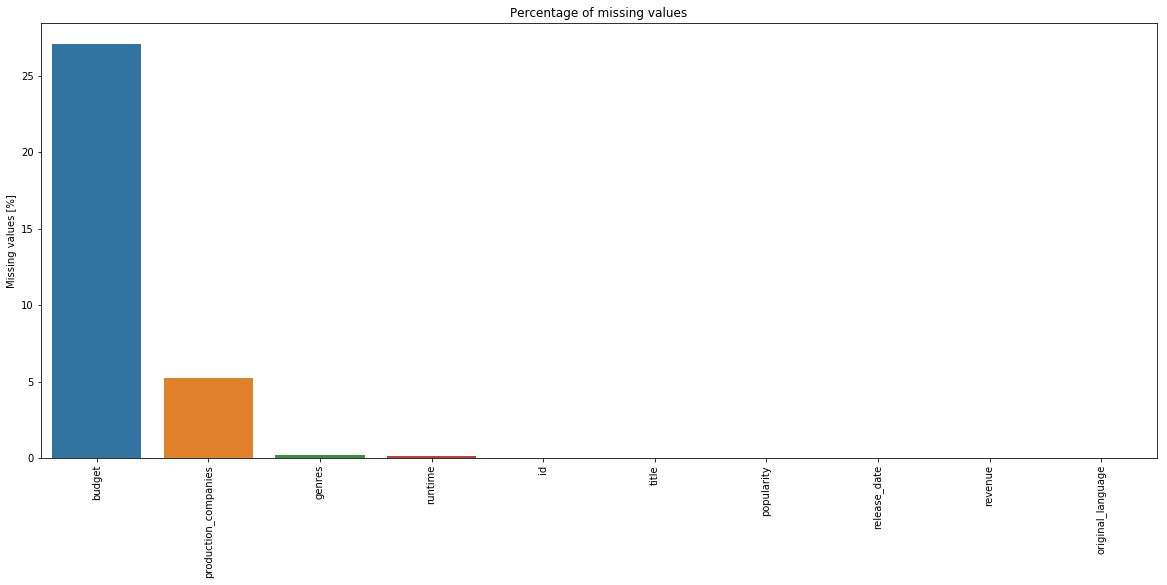

In [233]:
fields = dataset[["id", "title", "budget", "genres", "popularity", "release_date", "runtime", "revenue", "production_companies", "original_language"]]
pct_nans = round(fields.isnull().sum()/shape[0]*100,1).to_frame().sort_values(by=[0], ascending=False)
pct_nans.iloc[5,] = round((fields[["budget"]]==0).sum()/shape[0]*100,1).to_frame().iloc[0,0]
pct_nans = pct_nans.sort_values(by=[0], ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x=pct_nans.index, y=pct_nans[0])
plt.xticks(rotation=90)
plt.title("Percentage of missing values")
plt.ylabel("Missing values [%]")
plt.show()

In [234]:
fields.head()

,id,title,budget,genres,popularity,release_date,runtime,revenue,production_companies,original_language
0,1,Hot Tub Time Machine 2,14000000,"[{'id': 35, 'name': 'Comedy'}]",6.575393,2/20/15,93.0,12314651,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",en
1,2,The Princess Diaries 2: Royal Engagement,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",8.248895,8/6/04,113.0,95149435,"[{'name': 'Walt Disney Pictures', 'id': 2}]",en
2,3,Whiplash,3300000,"[{'id': 18, 'name': 'Drama'}]",64.299990,10/10/14,105.0,13092000,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",en
3,4,Kahaani,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",3.174936,3/9/12,122.0,16000000,NaN,hi
4,5,Marine Boy,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.148070,2/5/09,118.0,3923970,NaN,ko


In [235]:
def get_genres(row):
    if type(row) != type("str") and np.isnan(row):
            return "None"
    
    row = json.loads(row.replace("\'", "\""))
    genres = []
    for genre in row:
        genres.append(genre.get("name"))
    return genres
    
def get_release_date(row):
    yr = re.findall(r"\d+/\d+/(\d+)",row)

    if int(yr[0]) >= 18:
        return(row[:-2] + "19" + yr[0])
    else:
        return(row[:-2] + "20" + yr[0])
    
def get_production_companies(row):
    if type(row) != type("str") and np.isnan(row):
            return "None"
    text = row.replace("\"", "\'").replace("\'name\'", "\"name\"").replace("\'id\'", "\"id\"").replace(": \'", ": \"").replace("\', ", "\", ").replace("\\xa0","").encode('utf-8')
    row = json.loads(text)
    companies = []
    for companie in row:
        companies.append(companie.get("name"))
    return companies

In [240]:
fields.loc[:, "production_companies"] = dataset["production_companies"].apply(get_production_companies).values
fields.loc[:, "release_date"] = dataset["release_date"].apply(get_release_date).values
fields.loc[:, "genres"] = dataset["genres"].apply(get_genres).values

/home/claudiom/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
